<a href="https://colab.research.google.com/github/sidmahurkar/Article-370-Senti/blob/master/senti_on_article_370.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import io
import os
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
from nltk.stem import SnowballStemmer
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS	
from collections import Counter
from PIL import Image
import numpy as np
import urllib
import requests

In [6]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [7]:
os.chdir("/content/gdrive/My Drive")
os.listdir()

['SM',
 '04. CRO.pdf',
 '20181026_082203.mp4',
 'VID-20181101-WA0010.mp4',
 'Screenshot (224).png',
 'Colab Notebooks',
 'starterkitdata',
 'Classroom',
 'parser_transitions.py',
 'Consolidated_Problem_Statement.pdf',
 'twitter.csv',
 'chennai_reviews.csv',
 'Tweets.csv',
 'twit.csv',
 'twit.json',
 'twit525.json']

In [0]:
with open('twit525.json') as json_file:
    twitter = json.load(json_file)


In [9]:
twitter

[{'fullname': 'somitra jain मैं भी चौकीदार हूं',
  'html': '<p class="TweetTextSize js-tweet-text tweet-text" data-aria-label-part="0" lang="en"><a class="twitter-hashtag pretty-link js-nav" data-query-source="hashtag_click" dir="ltr" href="/hashtag/KashmirWithModi?src=hash"><s>#</s><b>KashmirWithModi</b></a>\nWith the scrapping of <strong>Article 370</strong>, the dream of Sardar Patel, Baba Saheb Ambedkar, Dr Syama Prasad Mukherjee, Atalji and of crores of patriots has been fulfilled.\nvia NaMo App</p>',
  'is_retweet': 0,
  'likes': 0,
  'replies': 0,
  'retweet_id': '',
  'retweeter_userid': '',
  'retweeter_username': '',
  'retweets': 0,
  'text': '#KashmirWithModi\nWith the scrapping of Article 370, the dream of Sardar Patel, Baba Saheb Ambedkar, Dr Syama Prasad Mukherjee, Atalji and of crores of patriots has been fulfilled.\nvia NaMo App',
  'timestamp': '2019-08-14T23:58:46',
  'timestamp_epochs': 1565827126,
  'tweet_id': '1161789291372171270',
  'tweet_url': '/somitrajain/st

In [10]:
type(twitter)

list

In [0]:
tweets = []
for tweet_info in twitter:
  tweet = tweet_info['text']
  tweets.append(tweet)

In [12]:
type(tweets[0])

str

In [13]:
tweets[-1]

'GOI getting ready to scrap Article 370 and 35A  and fortify the border with LOC POK  and Pakistan... https://lnkd.in/gN35bXR\xa0'

In [14]:
tweets[14589]

'My colleague from US messaged me today and asked "What is this article 370 & Kashmir controversy all newspapers are talking about and why is Pakistan so upset? Will this result in war with Pakistan now?"I told him "Look, 5 years ago, Facebook acquired instagram. Isn\'t it? 1/2'

In [0]:
time_of_tweets = []
for tweet_info in twitter:
  time = tweet_info['timestamp']
  time_of_tweets.append(time)

In [16]:
time_of_tweets[-1]

'2019-08-05T00:01:58'

In [17]:
time_of_tweets[14589]

'2019-08-13T01:25:00'

In [0]:
retweets = []
for tweet_info in twitter:
  retweet = tweet_info['retweets']
  retweets.append(retweet)

In [19]:
retweets[156423]

1

In [20]:
len(tweets)

282272

In [0]:
number_of_words = []
for i in range(len(tweets)):
  number_of_words.append(len(tweets[i].split(' ')))

In [0]:
tweet = pd.DataFrame(list(zip(tweets, retweets, time_of_tweets,number_of_words)), 
               columns =['text', 'retweet','created','number_of_words']) 

In [23]:
tweet.head()

,text,retweet,created,number_of_words
0,#KashmirWithModi\nWith the scrapping of Articl...,0,2019-08-14T23:58:46,29
1,#SACREDGAMES2 #Article370 #15AugustBlackDay,0,2019-08-14T23:57:31,3
2,Black day in remembrance of intelligence blund...,0,2019-08-14T23:56:14,18
3,1. Pakistan has changed the demographics with ...,0,2019-08-14T23:55:25,45
4,"BJP's Animated Explainer On ""How Article 370 W...",0,2019-08-14T23:54:22,15


In [24]:
tweet['text'][1]

'#SACREDGAMES2 #Article370 #15AugustBlackDay'

# **Text Pre-Processing**

In [0]:
import string

In [0]:
# remove all the punctuations from the input text.
def remove_punctuation(text):
  no_punct = "".join([c for c in text if c not in string.punctuation])
  return no_punct

In [0]:
tweet['text'] = tweet['text'].apply(lambda x: remove_punctuation(x))

In [28]:
tweet.tail()

,text,retweet,created,number_of_words
282267,Yes scrapping of article 35A and article 370,0,2019-08-05T00:07:03,8
282268,After Phulwama Gafoor said in his talk Media d...,0,2019-08-05T00:06:11,42
282269,Mehbooba kya betuki baatein kar rahi ho We are...,0,2019-08-05T00:06:01,32
282270,The Article370 Article35A are against the bas...,0,2019-08-05T00:02:05,25
282271,GOI getting ready to scrap Article 370 and 35A...,0,2019-08-05T00:01:58,21


# Word Clound

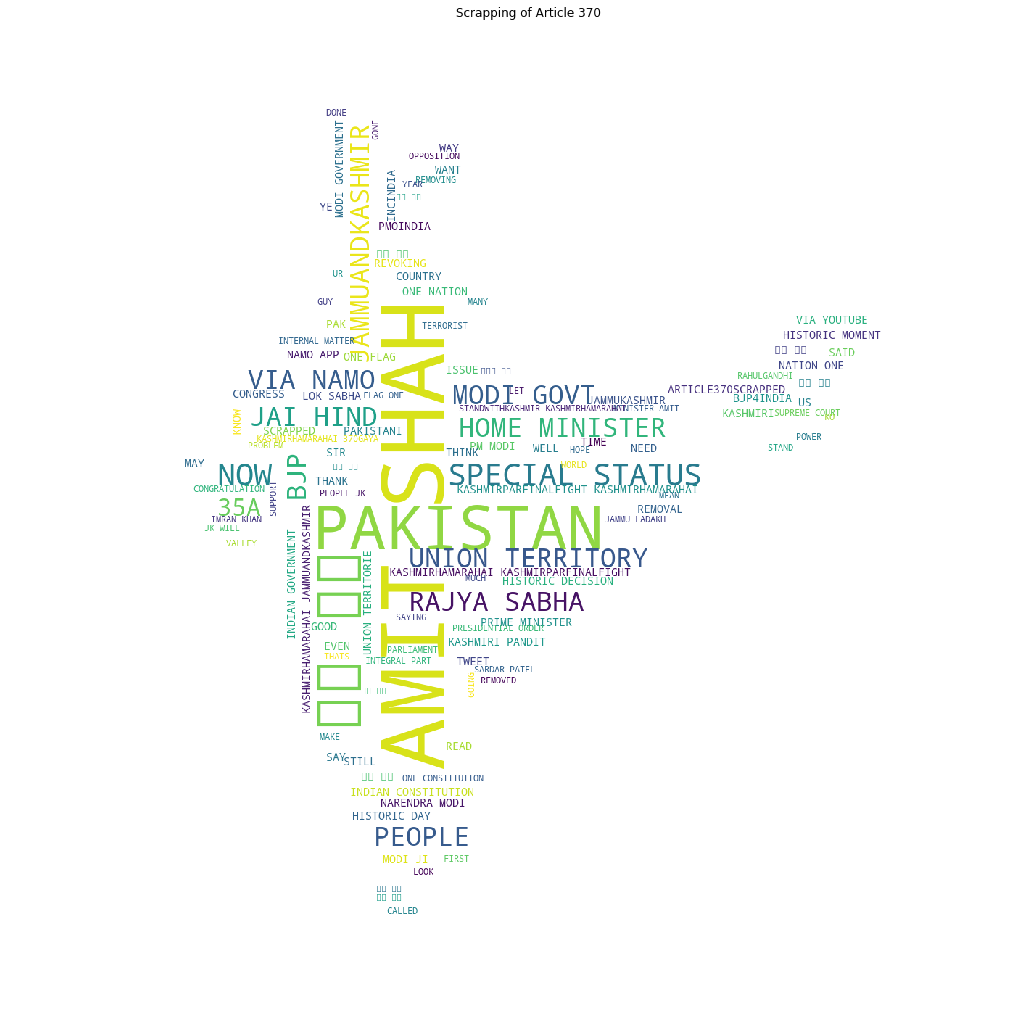

In [29]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

def wordcloud_by_province(tweets):
    stopwords = set(STOPWORDS)
    stopwords.add("https")
    stopwords.add("00A0")
    stopwords.add("00BD")
    stopwords.add("00B8")
    stopwords.add("ed")
    stopwords.add("Article 370")
    stopwords.add("Article370")
    stopwords.add("article 370")
    stopwords.add("article 35A")
    stopwords.add("Article35A")
    stopwords.add("Article 35A")
    stopwords.add("Kashmir")
    stopwords.add("kashmir")
    stopwords.add("scrap")
    stopwords.add("scrapping")
    stopwords.add("revoked")
    stopwords.add("Article")
    stopwords.add("abrogation")
    stopwords.add("revoke")
    stopwords.add("Narendra Modi")
    stopwords.add("Amit Shah")
    stopwords.add("India")
    stopwords.add("NarendraModi")
    stopwords.add("AmitShah")
    stopwords.add("Amit Shah")
    stopwords.add("amit shah")
    stopwords.add("today")
    #Narendra Modi is the Prime minister of India
    mask = np.array(Image.open(requests.get("https://miro.medium.com/max/900/1*w06eGRbeB7lili3q_45T_g.png", stream=True).raw))    
    wordcloud = WordCloud(background_color="white",stopwords=stopwords,mask=mask,max_words=200,max_font_size=40,scale=3,random_state = 2019).generate(" ".join([i for i in tweet['text'].str.upper()]))
    fig = plt.figure(1, figsize=(18, 18))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.title("Scrapping of Article 370")

wordcloud_by_province(tweets)

In [0]:
# lets try with words cotaining pakistan in them!!

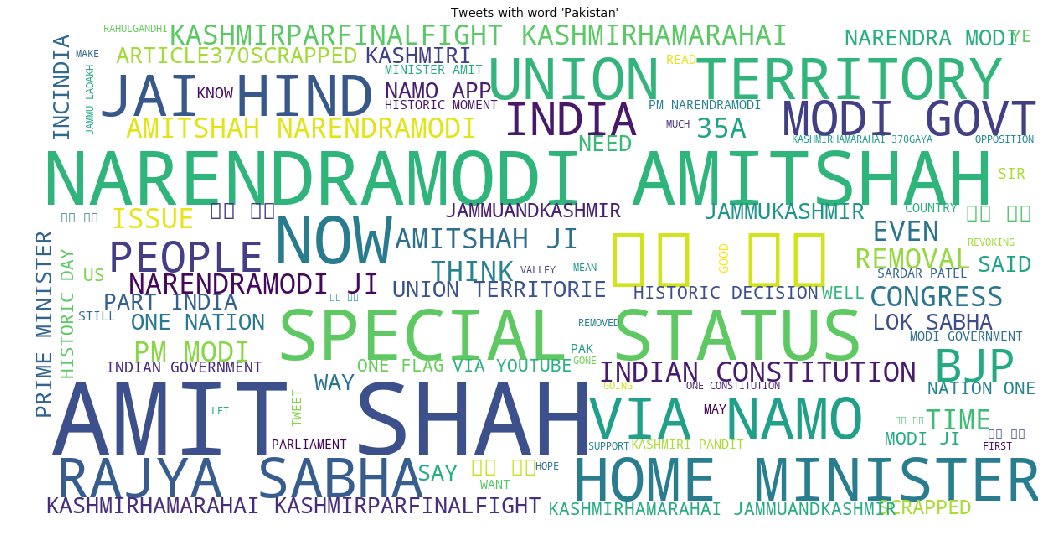

In [31]:
def wordcloud_by_province(tweets):
    a = pd.DataFrame(tweet['text'].str.contains("Pakistan").astype(int))
    b = list(a[a['text']==1].index.values)
    stopwords = set(STOPWORDS)
    stopwords.add("https")
    stopwords.add("00A0")
    stopwords.add("00BD")
    stopwords.add("00B8")
    stopwords.add("ed")
    stopwords.add("Article 370")
    stopwords.add("Article370")
    stopwords.add("article 370")
    stopwords.add("article 35A")
    stopwords.add("Article35A")
    stopwords.add("Article 35A")
    stopwords.add("Kashmir")
    stopwords.add("kashmir")
    stopwords.add("scrap")
    stopwords.add("scrapping")
    stopwords.add("revoked")
    stopwords.add("Article")
    stopwords.add("abrogation")
    stopwords.add("revoke")        
    stopwords.add("Pakistan")
    stopwords.add("pakistan")
    stopwords.add("today")
    stopwords.add("pakistani")
    stopwords.add("Pakistani")
    stopwords.add("Pakistanis")
    stopwords.add("pakistanis")
    wordcloud = WordCloud(background_color="white",stopwords=stopwords,max_words=200,max_font_size=40,scale=3,random_state = 2019).generate(" ".join([i for i in tweet['text'].str.upper()]))
    fig = plt.figure(1, figsize=(18, 18))    
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.title("Tweets with word 'Pakistan'")

wordcloud_by_province(tweets)  

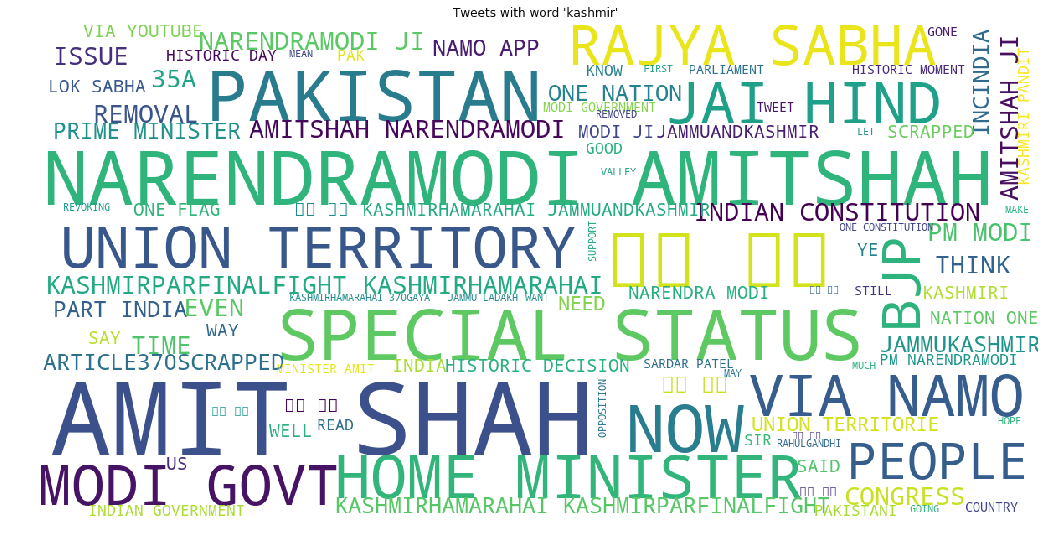

In [32]:
def wordcloud_by_province(tweets):
    a = pd.DataFrame(tweet['text'].str.contains("kashmir").astype(int))
    b = list(a[a['text']==1].index.values)
    stopwords = set(STOPWORDS)
    stopwords.add("https")
    stopwords.add("00A0")
    stopwords.add("00BD")
    stopwords.add("00B8")
    stopwords.add("ed")
    stopwords.add("Article 370")
    stopwords.add("Article370")
    stopwords.add("article 370")
    stopwords.add("article 35A")
    stopwords.add("Article35A")
    stopwords.add("Article 35A")
    stopwords.add("Kashmir")
    stopwords.add("kashmir")
    stopwords.add("scrap")
    stopwords.add("scrapping")
    stopwords.add("revoked")
    stopwords.add("Article")
    stopwords.add("abrogation")
    stopwords.add("revoke")        
    # stopwords.add("Pakistan")
    # stopwords.add("pakistan")
    stopwords.add("today")
    # stopwords.add("pakistani")
    # stopwords.add("Pakistani")
    # stopwords.add("Pakistanis")
    # stopwords.add("pakistanis")
    wordcloud = WordCloud(background_color="white",stopwords=stopwords,max_words=200,max_font_size=40,scale=3,random_state = 2019).generate(" ".join([i for i in tweet['text'].str.upper()]))
    fig = plt.figure(1, figsize=(18, 18))    
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.title("Tweets with word 'kashmir'")

wordcloud_by_province(tweets)  

In [0]:
# as it can be no matter what the domain is Narendra Modi and Amit Shah are names which dominates the tweets.

# Time Series!!

In [34]:
print(tweet['retweet'].describe())

count    282272.000000
mean          6.720450
std         108.878552
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max       13647.000000
Name: retweet, dtype: float64


In [35]:
number_of_words[3]

45

In [0]:
tweet['hour'] = pd.DatetimeIndex(tweet['created']).hour
tweet['date'] = pd.DatetimeIndex(tweet['created']).date
tweet['minute'] = pd.DatetimeIndex(tweet['created']).minute
tweet['day'] = pd.DatetimeIndex(tweet['created']).day

In [0]:

tweets_hour = tweet.groupby(['hour'])['retweet'].sum()
tweets_minute = tweet.groupby(['minute'])['retweet'].sum()
tweet['text_len'] = tweet['text'].str.len()
tweets_avgtxt_hour = tweet.groupby(['hour'])['text_len'].mean()
tweets_avgwrd_hour = tweet.groupby(['hour'])['number_of_words'].mean()

In [0]:
tweet_per_hour = tweet.groupby(['hour'])['text'].count()
tweet_per_day = tweet.groupby(['day'])['text'].count()

In [39]:
tweet.tail()

,text,retweet,created,number_of_words,hour,date,minute,day,text_len
282267,Yes scrapping of article 35A and article 370,0,2019-08-05T00:07:03,8,0,2019-08-05,7,5,44
282268,After Phulwama Gafoor said in his talk Media d...,0,2019-08-05T00:06:11,42,0,2019-08-05,6,5,224
282269,Mehbooba kya betuki baatein kar rahi ho We are...,0,2019-08-05T00:06:01,32,0,2019-08-05,6,5,184
282270,The Article370 Article35A are against the bas...,0,2019-08-05T00:02:05,25,0,2019-08-05,2,5,201
282271,GOI getting ready to scrap Article 370 and 35A...,0,2019-08-05T00:01:58,21,0,2019-08-05,1,5,117


Text(0.5, 1.0, 'The number of tweets per day')

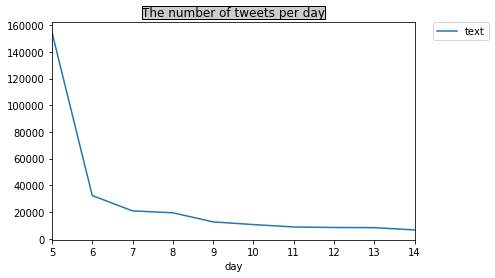

In [40]:
import seaborn as sns
tweet_per_day.transpose().plot(kind='line',figsize=(6.5, 4))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('The number of tweets per day', bbox={'facecolor':'0.8', 'pad':0})
# the days are in august. 
# 5: 5 Aug 2019 and 14: 14 Aug 2019

Text(0.5, 1.0, 'The number of tweets per hour')

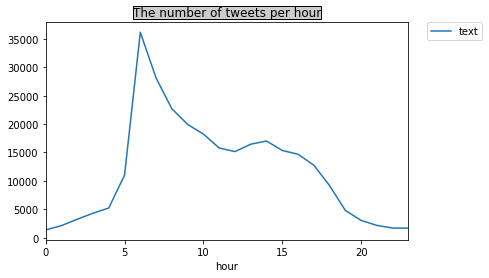

In [41]:
import seaborn as sns
tweet_per_hour.transpose().plot(kind='line',figsize=(6.5, 4))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('The number of tweets per hour', bbox={'facecolor':'0.8', 'pad':0})

Text(0.5, 1.0, 'The number of retweet by hour')

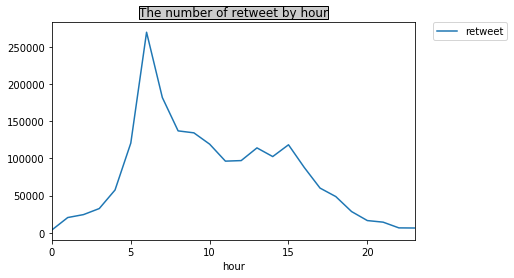

In [42]:
import seaborn as sns
tweets_hour.transpose().plot(kind='line',figsize=(6.5, 4))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('The number of retweet by hour', bbox={'facecolor':'0.8', 'pad':0})

Text(0.5, 1.0, 'The number of retweet by minute')

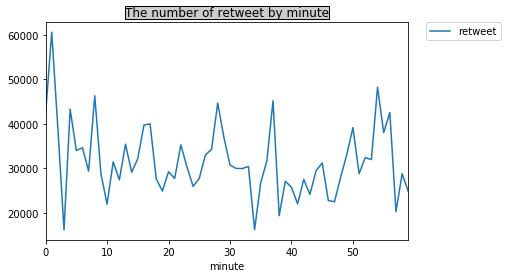

In [43]:
tweets_minute.transpose().plot(kind='line',figsize=(6.5, 4))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('The number of retweet by minute', bbox={'facecolor':'0.8', 'pad':0})

Text(0.5, 1.0, 'The Average length of tweet by hour')

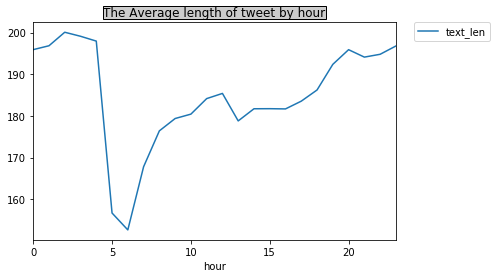

In [44]:
tweets_avgtxt_hour.transpose().plot(kind='line',figsize=(6.5, 4))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('The Average length of tweet by hour', bbox={'facecolor':'0.8', 'pad':0})

Text(0.5, 1.0, 'The Average number of words in a tweet by hour')

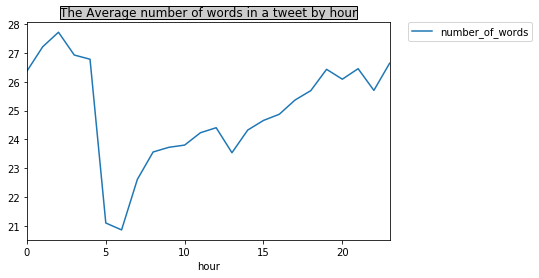

In [45]:
tweets_avgwrd_hour.transpose().plot(kind='line',figsize=(6.5, 4))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('The Average number of words in a tweet by hour', bbox={'facecolor':'0.8', 'pad':0})

# to get most frequent words


In [0]:
def get_stop_words(s, n):
  from collections import Counter
  l = get_corpus(s)
  l = remove_stopwords(l)
  l = [x for x in Counter(l).most_common(n)]
  return l
	# '''
	# s: list of words tokenized.
	# :n : int; n most frequent words are judged as stop words 

	# :return : list; a list of stop words
	# '''
  # from collections import Counter
  # l = get_corpus(s)
  # l = remove_stopwords(l)
 	# l = [x for x in Counter(l).most_common(n)]
	# return l


 

In [0]:
def remove_stopwords(text):
  import nltk
  nltk.download('stopwords')
  words = [w for w in text if w not in stopwords.words('english')]
  return words

def get_corpus(s):
  l = []
  for i in range(len(s)):
    l.extend(s[i].split())
  return l


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


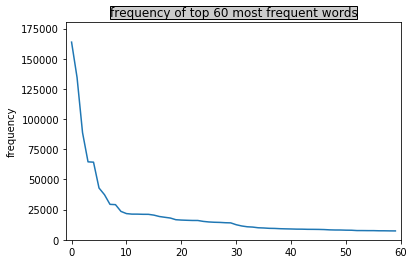

In [48]:
freqwords = get_stop_words(tweet['text'],60)

freq = [s[1] for s in freqwords]
w = [s[0] for s in freqwords]

plt.title('frequency of top 60 most frequent words', bbox={'facecolor':'0.8', 'pad':0})
plt.plot(freq)
plt.xlim([-1,60])
plt.ylim([0,1.1*max(freq)])
plt.ylabel('frequency')
plt.show()

In [49]:
print(freqwords)

[('Article370', 163834), ('370', 134548), ('Article', 88814), ('…', 64614), ('Kashmir', 64338), ('India', 42943), ('article', 37363), ('के', 29377), ('AmitShah', 29140), ('KashmirHamaraHai', 23533), ('narendramodi', 21718), ('है', 21284), ('में', 21270), ('JammuAndKashmir', 21133), ('JK', 21110), ('का', 20449), ('को', 19305), ('I', 18653), ('की', 18037), ('Jammu', 16645), ('Modi', 16352), ('The', 16181), ('Indian', 16031), ('से', 16011), ('people', 15255), ('Pakistan', 14793), ('35A', 14540), ('KashmirParFinalFight', 14419), ('और', 14153), ('Article35A', 14027), ('कश्मीर', 12494), ('decision', 11463), ('पर', 10802), ('via', 10542), ('ने', 9977), ('BJP', 9799), ('scrapping', 9512), ('Congress', 9426), ('hai', 9199), ('This', 9070), ('like', 8968), ('state', 8834), ('Ladakh', 8806), ('A', 8686), ('abrogation', 8661), ('one', 8609), ('PM', 8489), ('एक', 8246), ('ji', 8132), ('StandwithKashmir', 8112), ('370gaya', 7975), ('जी', 7926), ('Kashmiri', 7653), ('Shah', 7645), ('भारत', 7599), ('k

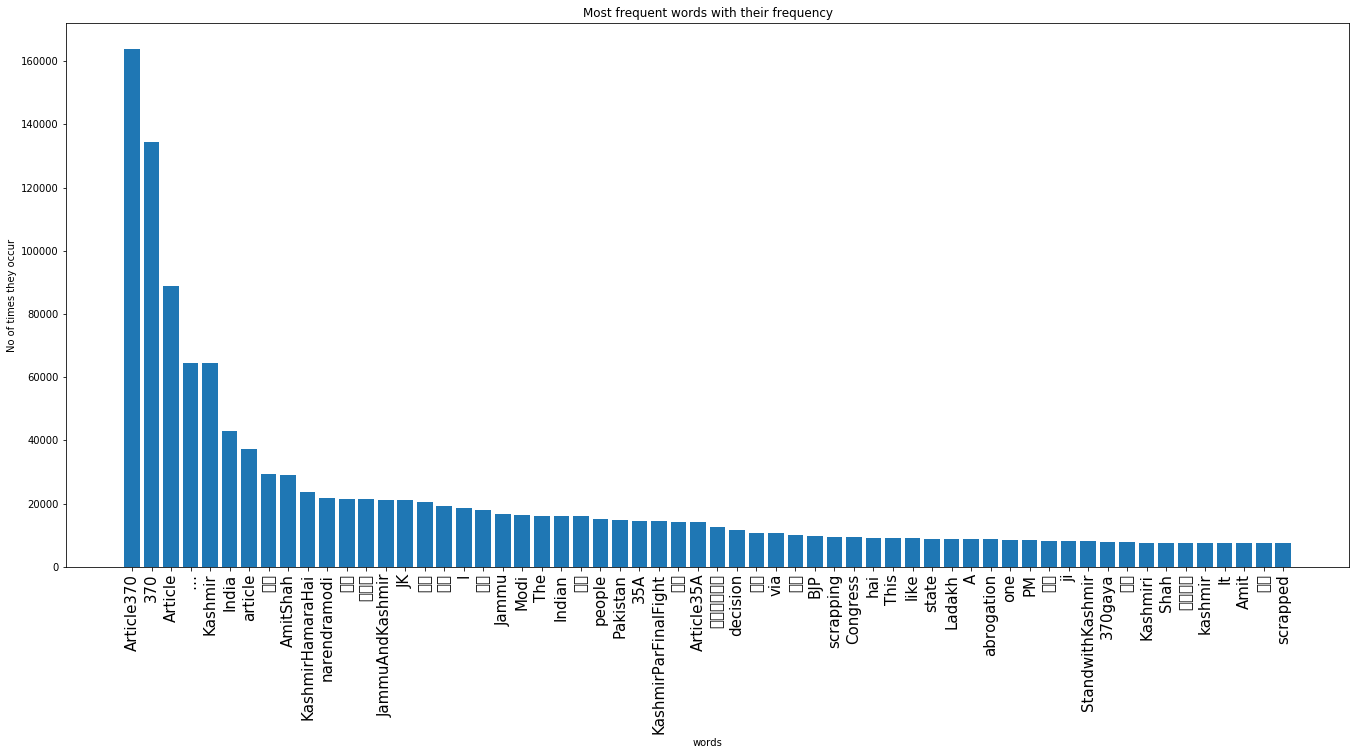

In [50]:
index = np.arange(len(freqwords))
plt.figure(figsize=(23, 10))
plt.bar(index, freq)
plt.xlabel('words', fontsize=10)
plt.ylabel('No of times they occur', fontsize=10)
plt.xticks(index, w, fontsize=15, rotation=90)
plt.title('Most frequent words with their frequency')
plt.show()

In [0]:
#getting the hashtags used in the tweets:
hashtags = []
for i in range(len(tweets)):
  hashtags.extend(j for j in tweets[i].split() if j.startswith("#"))
# [i  for i in s.split() if i.startswith("#") ]

In [0]:
freq_of_hashtags = []
freq_of_hashtags = [x for x in Counter(hashtags).most_common(60)]
freqq = [s[1] for s in freq_of_hashtags]
tags = [s[0] for s in freq_of_hashtags ]

In [53]:
print(freq_of_hashtags)

[('#Article370', 154850), ('#KashmirHamaraHai', 23428), ('#JammuAndKashmir', 20442), ('#Kashmir', 15572), ('#KashmirParFinalFight', 14377), ('#Article35A', 13513), ('#AmitShah', 8919), ('#StandwithKashmir', 8058), ('#370gaya', 7924), ('#Article370Scrapped', 7044), ('#KashmirBleeds', 5710), ('#Article370revoked', 4770), ('#KashmirMeinTiranga', 4680), ('#India', 4123), ('#ModiHaiToMumkinHai', 4105), ('#article370', 4073), ('#JammuKashmir', 3587), ('#Pakistan', 3418), ('#IndiaForKashmir', 3032), ('#BharatEkHai', 2986), ('#KashmirWithModi', 2886), ('#Artical35A', 2796), ('#Article370.', 2718), ('#NarendraModi', 2710), ('#370Scrapped', 2518), ('#KashmirIntegrated', 2465), ('#Ladakh', 2434), ('#kashmir', 2345), ('#JaiHind', 2062), ('#kashmiroperation', 2026), ('#KashmirIssue', 2005), ('#Remove35A', 1890), ('#370Abolished', 1828), ('#BJP', 1747), ('#ModiKillingKashmiris', 1739), ('#Article35', 1713), ('#Article370,', 1661), ('#35A', 1637), ('#KashmirUnderThreat', 1483), ('#Modi', 1360), ('#Sa

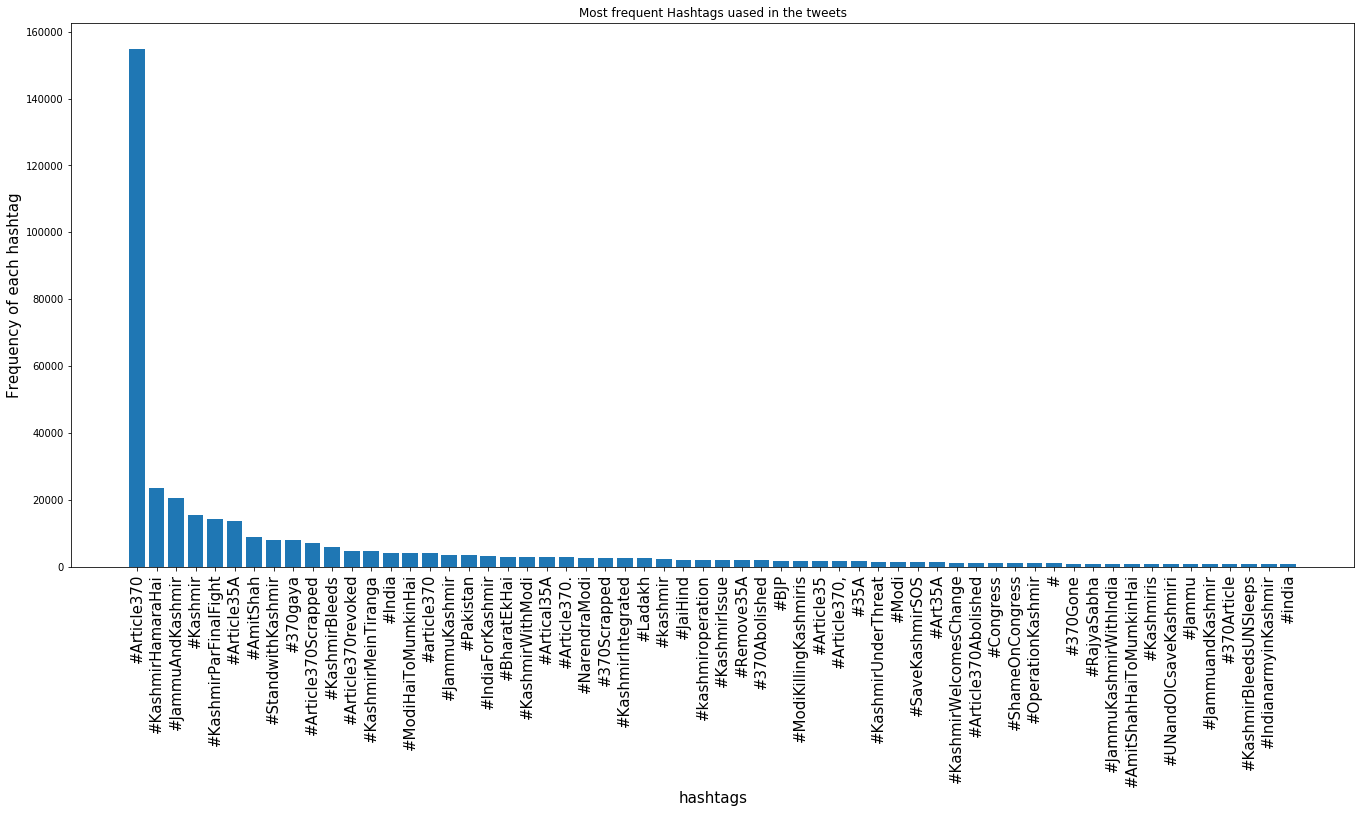

In [54]:
index = np.arange(len(freq_of_hashtags))
plt.figure(figsize=(23, 10))
plt.bar(index, freqq)
plt.xlabel('hashtags', fontsize=15)
plt.ylabel('Frequency of each hashtag', fontsize=15)
plt.xticks(index, tags, fontsize=15, rotation=90)
plt.title('Most frequent Hashtags uased in the tweets')
plt.show()

# Sentiment Analysis

In [0]:
# Using Spacy

from textblob import TextBlob

In [56]:
tb1 = (" We are learning cool Library . We are enjoying a lot.")
x = TextBlob(tb1).sentiment.polarity
print(x)

0.425


In [0]:
def preprocess_tweet(text):
  # # Remove any RT mentions present in the tweets.
  # text = re.sub(r'^RT[\s]+', ' ', text)
  # Remove any https links present to URL
  text = re.sub('((www\.[^\s]+)|(https?://[^\s]+))','URL',text)
  # # Remove any  http links present to URL
  # text = re.sub('((www\.[^\s]+)|(http?://[^\s]+))','URL',text)
  # Convert any "#xyz" to "xyz" only
  text = re.sub(r'#([^\s]+)', r'\1', text)
  # Convert all the @ mentins to "at_USER"
  text = re.sub(r'@[A-Za-z0–9]+', 'at_USER', text)
  # Correct all multiple white spaces to a single white space
  text = re.sub('[\s]+', ' ', text)

  return text 

In [0]:
tweet['pros_text'] = tweet['text'].apply(preprocess_tweet)

In [59]:
tweet.tail()

,text,retweet,created,number_of_words,hour,date,minute,day,text_len,pros_text
282267,Yes scrapping of article 35A and article 370,0,2019-08-05T00:07:03,8,0,2019-08-05,7,5,44,Yes scrapping of article 35A and article 370
282268,After Phulwama Gafoor said in his talk Media d...,0,2019-08-05T00:06:11,42,0,2019-08-05,6,5,224,After Phulwama Gafoor said in his talk Media d...
282269,Mehbooba kya betuki baatein kar rahi ho We are...,0,2019-08-05T00:06:01,32,0,2019-08-05,6,5,184,Mehbooba kya betuki baatein kar rahi ho We are...
282270,The Article370 Article35A are against the bas...,0,2019-08-05T00:02:05,25,0,2019-08-05,2,5,201,The Article370 Article35A are against the basi...
282271,GOI getting ready to scrap Article 370 and 35A...,0,2019-08-05T00:01:58,21,0,2019-08-05,1,5,117,GOI getting ready to scrap Article 370 and 35A...


In [0]:
#Sentiment analysis
# import textblob as TextBlob
# def polarity(text):
#   blob = TextBlob(text)
#   polarity = blob.sentiment.polarity
#   return polarity

# def subjectivity(text):
#   blob = TextBlob(text)
#   subjectivity = blob.sentiment.subjectivity
#   return subjectivity

polarity = (lambda x: TextBlob(x).sentiment.polarity)
subjectivity = (lambda x: TextBlob(x).sentiment.subjectivity)

tweet['polarity'] = tweet['pros_text'].apply(polarity)
tweet['subjectivity'] = tweet['pros_text'].apply(subjectivity)

In [0]:
plt.rcParams['figure.figsize'] = [10, 8]
for index, Tweets in enumerate(tweet.index):
 x = tweet.polarity.loc[Tweets]
 y = tweet.subjectivity.loc[Tweets]
 plt.scatter(x, y, color='Red')
 
 
plt.title('Sentiment Analysis', fontsize = 20)
plt.xlabel('← Negative — — — — — — Positive →', fontsize=15)
plt.ylabel('← Facts — — — — — — — Opinions →', fontsize=15)
plt.show()